In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')


import pylab as plt
import seaborn as sns


%matplotlib inline

In [3]:
sharkdata = pd.read_csv('DATA/attacks.csv', encoding= "ISO-8859-1")

sharkdata.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Copia del original.

In [4]:
orishark = sharkdata.copy()

## Función para obtener un gráfico sobre los valores nulos.

In [5]:
nan_cols = sharkdata.isna().sum()


def check_nan(sharkdata: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = sharkdata.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(sharkdata.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

## Exploración de datos.

### Tamaño del dataframe

In [6]:
sharkdata.shape

(25723, 24)

### Información sobre el archivo.

In [7]:
sharkdata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
sharkdata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,8702,6287,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
Type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transformar el nombre de las columnas, poner todas las letras minúsculas, rellenar espacios en blanco entre palabras con '_' y quitar espacios al final de la palabra 'Sex' y 'Species'

In [9]:
sharkdata.columns=[c.lower().replace(' ', '_').replace('sex_', 'sex').replace('species_', 'species')for c in sharkdata.columns]

### Tipo de dato de cada columna

In [10]:
sharkdata.dtypes

case_number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex                        object
age                        object
injury                     object
fatal_(y/n)                object
time                       object
species                    object
investigator_or_source     object
pdf                        object
href_formula               object
href                       object
case_number.1              object
case_number.2              object
original_order            float64
unnamed:_22                object
unnamed:_23                object
dtype: object

## Obtención de columnas numéricas.

In [11]:
num_shark = sharkdata.select_dtypes(exclude='object')
num_shark.head()

,year,original_order
0,2018.0,6303.0
1,2018.0,6302.0
2,2018.0,6301.0
3,2018.0,6300.0
4,2018.0,6299.0


In [12]:
sharkdata._get_numeric_data().head()

,year,original_order
0,2018.0,6303.0
1,2018.0,6302.0
2,2018.0,6301.0
3,2018.0,6300.0
4,2018.0,6299.0


## Obtención de columnas categóricas.

In [13]:
cat_shark = sharkdata.select_dtypes(exclude=['int64', 'float64'])

cat_shark.head()

,case_number,date,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN


## Valores nulos.

In [14]:
nan_cols = sharkdata.isna().sum()

nan_cols[nan_cols > 0]

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

In [15]:
nan_cols = sharkdata.isna().mean() * 100

nan_cols[nan_cols > 0]

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex                       77.697003
age                       86.506240
injury                    75.609377
fatal_(y/n)               77.595926
time                      88.539439
species                   86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number.1             75.500525
case_number.2             75.500525
original_order            75.473312
unnamed:_22               99.996112
unnamed:_23               99.992225
dtype: float64

## Gráfico de nulos.

'N nan cols: 24'

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex                       77.697003
age                       86.506240
injury                    75.609377
fatal_(y/n)               77.595926
time                      88.539439
species                   86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number.1             75.500525
case_number.2             75.500525
original_order            75.473312
unnamed:_22               99.996112
unnamed:_23               99.992225
dtype: float64

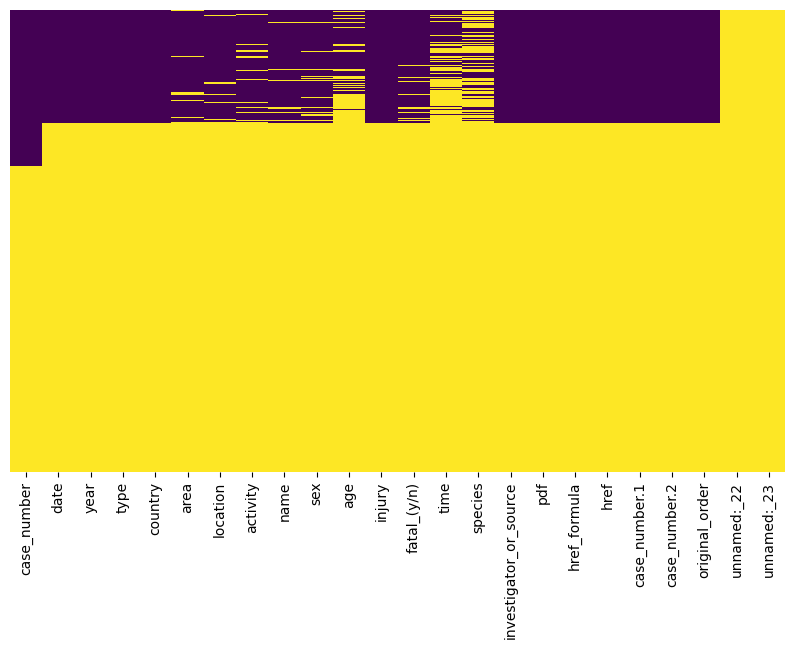

In [16]:
check_nan(sharkdata)

## Eliminar filas cuyas celdas sólo contienen valores nulos.

In [17]:
sharkdata = sharkdata.dropna(how='all')

'N nan cols: 24'

case_number                0.011490
date                      27.588188
year                      27.611169
type                      27.634149
country                   28.162703
area                      32.816270
location                  33.792945
activity                  33.838906
name                      30.001149
sex                       34.080202
age                       60.117201
injury                    27.909916
fatal_(y/n)               33.781455
time                      66.126623
species                   60.197633
investigator_or_source    27.783523
pdf                       27.588188
href_formula              27.599678
href                      27.588188
case_number.1             27.588188
case_number.2             27.588188
original_order            27.507756
unnamed:_22               99.988510
unnamed:_23               99.977019
dtype: float64

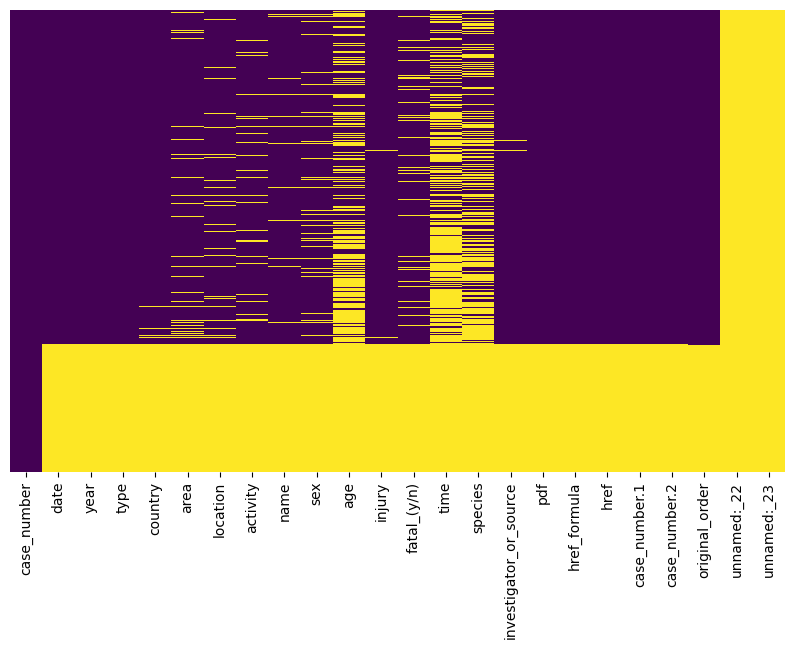

In [18]:
check_nan(sharkdata)

### Elimino las filas completamente vacías


Esto lo he hecho visualizando la tabla en excel, no tengo ni idea de como hacerlo con pandas

In [19]:
sharkdata.drop(sharkdata.index[6304:], inplace=True)

In [20]:
sharkdata.shape

(6304, 24)

In [21]:
sharkdata.columns


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

Rellenar nulos de las columnas con las que no voy a trabajar

Aquí seguro que hay una mejor manera de rellenar todos los términos nulos sin tener que redactar la biblia con código.

In [22]:
sharkdata.year.fillna('unknown', inplace = True)
sharkdata.date.fillna('unknown', inplace = True)
sharkdata.country.fillna('unknown', inplace = True)
sharkdata.area.fillna('unknown', inplace = True)
sharkdata.location.fillna('unknown', inplace = True)
sharkdata.name.fillna('unknown', inplace = True)
sharkdata.age.fillna('unknown', inplace = True)
sharkdata.injury.fillna('unknown', inplace = True)
sharkdata.time.fillna('unknown', inplace = True)
sharkdata.species.fillna('unknown', inplace = True)
sharkdata.investigator_or_source.fillna('unknown', inplace = True)
sharkdata.pdf.fillna('unknown', inplace = True)
sharkdata.href_formula.fillna('unknown', inplace = True)
sharkdata.href.fillna('unknown', inplace = True)
sharkdata['case_number.1'].fillna('unknown', inplace = True)
sharkdata['case_number.2'].fillna('unknown', inplace = True)
sharkdata.original_order.fillna('unknown', inplace = True)
sharkdata['unnamed:_22'].fillna('unknown', inplace = True)
sharkdata['unnamed:_23'].fillna('unknown', inplace = True)

'N nan cols: 5'

case_number    0.015863
type           0.095178
activity       8.661168
sex            8.994289
fatal_(y/n)    8.581853
dtype: float64

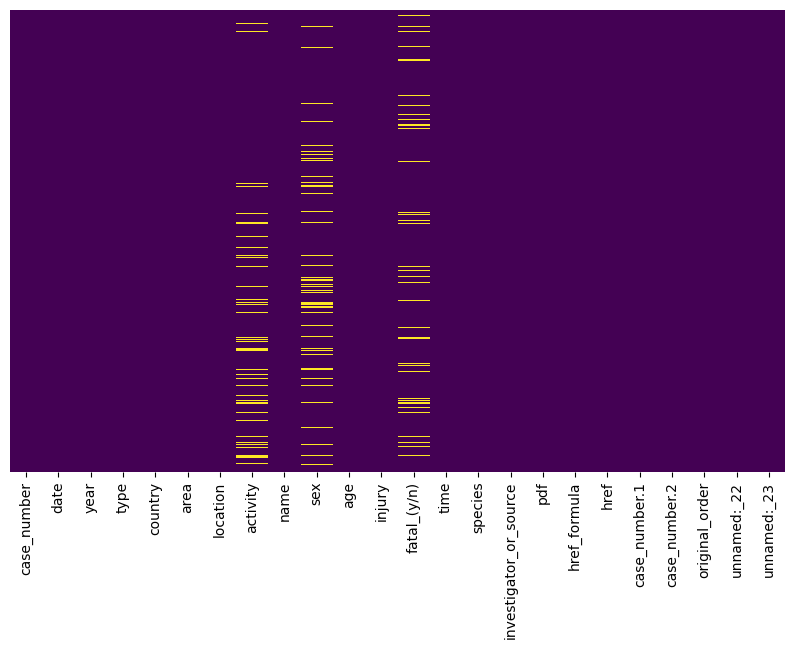

In [23]:
check_nan(sharkdata)

Selección de partes con las que trabajar.

In [24]:
# Empiezo con la columna fatal_(y/n) ya que solo puede contener dos valores, Y o N

sharkdata['fatal_(y/n)'].value_counts()


N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal_(y/n), dtype: int64

In [25]:
# Sustituyo los valores nulos por 'unknown'

sharkdata['fatal_(y/n)'].fillna('unknown', inplace= True)

In [26]:
# Primero transformo el tipo de dato a str para poder trabajar con él.

sharkdata["fatal_(y/n"] = sharkdata["fatal_(y/n)"].astype(str)

In [27]:
# Hago que todos los caracteres no numéricos sean minúscula, y reemplazo los espacios por nada

sharkdata['fatal_(y/n)'] = [c.lower().replace(' ', '')for c in sharkdata['fatal_(y/n)']]

In [28]:
sharkdata['fatal_(y/n)'].value_counts()

n          4301
y          1389
unknown     612
m             1
2017          1
Name: fatal_(y/n), dtype: int64

In [29]:
# Voy a asumir, que si el ataque del tiburón no es mortal, es equivalente a 'n' en la columna fatal_(y/n).

sharkdata['fatal_(y/n)'] = [c.replace('unknown', 'n').replace('m', 'n').replace('2017', 'n')for c in sharkdata['fatal_(y/n)']]

In [30]:
sharkdata['fatal_(y/n)'].value_counts()

n    4915
y    1389
Name: fatal_(y/n), dtype: int64

'N nan cols: 4'

case_number    0.015863
type           0.095178
activity       8.661168
sex            8.994289
dtype: float64

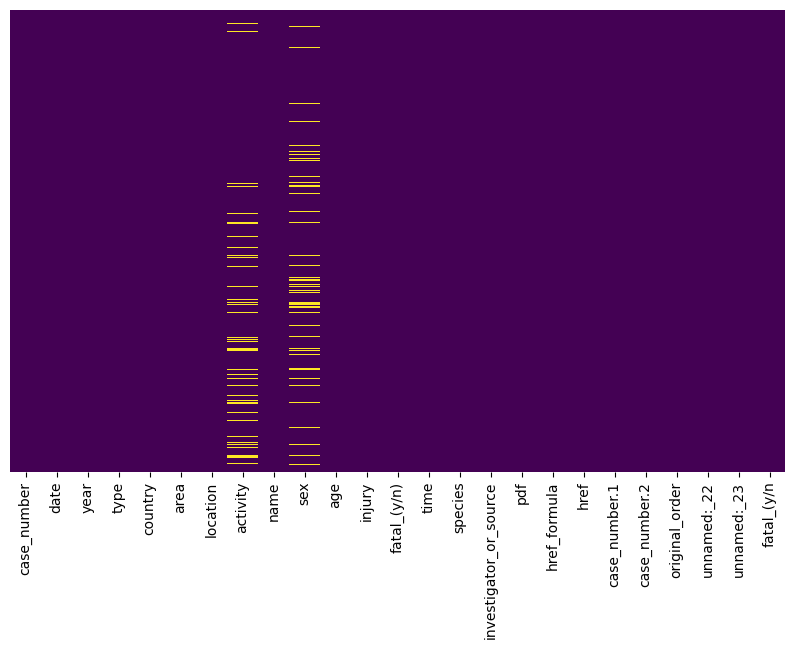

In [31]:
check_nan(sharkdata)

In [32]:
# Ahora con la columna sex
# Pasamos a str todo el dataframe

sharkdata.sex = sharkdata.sex.astype(str)

In [34]:
# Reemplazamos los valores nulos por 'unknown'

sharkdata.sex.fillna('unknown', inplace= True)

In [35]:
# Normalizo los términos dentro de la columna para poder trabajar con ellos

sharkdata['sex'] = [c.lower().replace(' ','').replace('nan', '-').replace('lli', '-').replace('.', '-').replace('n', '-')for c in sharkdata['sex']]

In [36]:
# Valores de la columna

sharkdata.sex.value_counts()

m    5096
f     637
-     571
Name: sex, dtype: int64

In [37]:
# Hay 571 datos que no coinciden con el género m o f, voy a intentar compararlos con la columna de name a ver si es posible asignar algún genero a los que faltan.

In [38]:
# Elimino las filas cuyos valores en la columna 'name' sea 'unknown' y en la columna 'sex' sea '-'.

sharkdata = sharkdata[~((sharkdata['name'] == 'unknown') & (sharkdata['sex'] == '-'))]

In [39]:
# Compruebo que me he quitado filas de enmedio

sharkdata.shape

(6155, 25)

In [40]:
# Visualizo la cantidad de términos '-' que han desaparecido

sharkdata.sex.value_counts()

m    5096
f     637
-     422
Name: sex, dtype: int64

149 filas menos!

In [41]:
# Ojeo los valores de la columna 'name'

sharkdata.name.value_counts()  


male                               550
female                              97
unknown                             66
boy                                 23
2 males                             16
                                  ... 
Jeremiah Wyche                       1
Frederico Nóbrega (aka Derico)       1
Joo Whan Hong                        1
Alton Cicero da Silva                1
Jules Patterson                      1
Name: name, Length: 5230, dtype: int64

In [42]:
# Al ver que en la columna aparecen nombres como 'boy' o '2 males' los cambio por male para ajustar un poco.

sharkdata['name'] = [c.lower().replace('boy', 'male').replace('2 males', 'male')for c in sharkdata['name']]

In [43]:
# Vistazo a las filas donde aparece el término unknown en la columna name y el término '-' en la columna sex

sharkdata.loc[(sharkdata["name"] != "unknown") & (sharkdata["sex"] == "-")]


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fatal_(y/n
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,unknown,Gars Garabulli,2 boats capsized,31 migrants,-,unknown,FATAL,y,unknown,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0,unknown,unknown,Y
179,2017.02.01.b,01-Feb-2017,2017.0,Boating,USA,South Carolina,16 miles off Hilton Head,Tagging sharks,chip michelove & crew,-,unknown,"Shark bit boat, no injury to occupants",n,unknown,"White shark, female, 14'","YouTube, 2/2/2017",2017.02.01.b-Boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.02.01.b,2017.02.01.b,6124.0,unknown,unknown,N
218,2016.09.15.R,15-Sep-2016,2016.0,Boating,AUSTRALIA,Western Australia,Bunbury,Fishing,occupant: ben stratton,-,unknown,Shark rammed boat. No injury to occupant,n,unknown,unknown,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,6085.0,unknown,unknown,N
243,2016.07.17,17-Jul-2016,2016.0,Boating,USA,Alabama,8 miles off Mobile,Fishing in Alabama Deep Fishing Rodeo,occupant: ben raines,-,unknown,"No injury, shark bit trolling motor",n,unknown,"Tiger shark, 10'","Al.com, 7/19/2016",2016.07.17-Gulf.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.17,2016.07.17,6060.0,unknown,unknown,N
326,2015.12.13,13-Dec-2015,2015.0,Boating,AUSTRALIA,New South Wales,Lake Macquarie,Fishing,6 m boat: occupants stephen & andrew crust,-,unknown,"No injury, shark rammed boat & bit motor",n,10h30,"White shark, 3.5 m","Courier Mail, 12/15/2015",2015.12.13-Crust-Boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.12.13,2015.12.13,5977.0,unknown,unknown,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,1617.00.00.R,Reported 1617,1617.0,Unprovoked,INDIA,West Bengal,Ganges Delta,NaN,indian people,-,unknown,unknown,n,unknown,unknown,"H. Edwards, p.31, citing Samuel Purchas",1617.00.00-Purchas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1617.00.00.R,1617.00.00.R,136.0,unknown,unknown,UNKNOWN
6202,ND-0119,Before 1963,0.0,Unprovoked,DJIBOUTI,Gulf of Tadjoura,unknown,A dhow capsized,passenger & crew,-,unknown,FATAL,y,unknown,unknown,A. C. Doyle,ND-0119-Gulf-of-Tadjoura.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0119,ND-0119,101.0,unknown,unknown,Y
6212,ND-0107,Before 2004,0.0,Boat,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, occupants: rod salm & 4 fri...",-,unknown,"No injury to occupants, shark bumped boat",n,unknown,Whale shark,South African Shark Attack File,ND-0107-Inhambane.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0107,ND-0107,91.0,unknown,unknown,N
6259,ND.0044,1941-1945,0.0,Sea Disaster,unknown,unknown,unknown,A group of survivors on a raft for 17-days,c.,-,unknown,"FATAL, shark leapt into raft and bit the man w...",y,Late afternoon,1.2 m [4'] shark,"G.A. Llano in Airmen Against the Sea, p.69",ND-0044-C.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0044,ND.0044,44.0,unknown,unknown,Y


Siendo mi interés descubrir el género donde es más frecuente sufrir un ataque de tiburon, al comparar las columnas 'name' y 'sex' me doy cuenta de que cuando no se determina el sexo de la persona es porque es un grupo de personas el afectado y no hay manera de saber el género de esa gente, con lo cual tomo esas filas como innecesarias.

In [44]:
# Quito de la lista las filas que no me coinciden con lo que busco

sharkdata = sharkdata[~((sharkdata['name'] != 'unknown') & (sharkdata['sex'] == '-'))]

In [45]:
sharkdata.sex.value_counts()

m    5096
f     637
-       4
Name: sex, dtype: int64

Aún me quedan 4 personas con género desconocido, voy a seguir comparando por si puedo encajar alguno en la lista

In [46]:
sharkdata.loc[sharkdata["sex"] == "-"]


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fatal_(y/n
1626,2004.11.00,Nov-2004,2004.0,Unprovoked,NEW CALEDONIA,North Province,Koumac,Diving,unknown,-,unknown,Forearm bitten,n,unknown,3 m shark,"Les Nouvelles Caledoniennes, 11/19/2004",2004.11.00-Koumac.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.00,2004.11.00,4677.0,unknown,unknown,N
1973,2001.03.00,Mar-2001,2001.0,Sea Disaster,CARIBBEAN SEA,unknown,Between St. Maarten & Anguilla,Sinking of the 40' Esperanza off St. Maartin w...,unknown,-,unknown,Human remains recovered in shark caught off An...,y,unknown,"Tiger shark, 8'","C. Johansson, GSAF",2001.03.00-Anguilla.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.03.00,2001.03.00,4330.0,unknown,unknown,Y
3186,1976.04.28,28-Apr-1976,1976.0,Invalid,USA,Texas,Galveston Island,NaN,unknown,-,unknown,"Possible drowning victim, remains retrieved fr...",n,unknown,Shark involvement prior to death was not confi...,"NY Times 4/30/1976, p.14, col.8",1976.04.28-HumanRemains-Galveston.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1976.04.28,1976.04.28,3117.0,unknown,unknown,unknown
5115,1928.01.21.b,21-Jan-1928,1928.0,Invalid,USA,Florida,unknown,Swimming,unknown,-,unknown,Body not recovered,n,Night,Shark involvement not confirmed,H.D. Baldridge (1994) SAF Case #838,1928.01.21.b-Florida-Swimmer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1928.01.21.b,1928.01.21.b,1188.0,unknown,unknown,unknown


Al comparar las columnas resulta que tanto el sexo, como su nombre son desconocidos, descarto las filas.

In [47]:
sharkdata = sharkdata[~((sharkdata['name'] == 'unknown') & (sharkdata['sex'] == '-'))]

In [48]:
sharkdata.sex.value_counts()

m    5096
f     637
Name: sex, dtype: int64

Ahora ya sabemos la cantidad de hombres o mujeres que han muerto bajo el ataque de los tiburones.

## Tipos de ataque

voy a volver un poco atrás y voy a comparar los ataques antes definidos con y o n con la columna injury y ver si términos como FATAL coinciden con 'y'

In [49]:
sharkdata.shape


(5733, 25)

In [50]:
sharkdata.loc[(sharkdata["fatal_(y/n)"] == "n") & (sharkdata["injury"] == "FATAL")]


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fatal_(y/n
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,bradley fick,m,31,FATAL,n,unknown,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,2017.10.01,6227.0,unknown,unknown,unknown
874,2011.08.28.b,28-Aug-2011,2011.0,Invalid,AUSTRALIA,Queensland,Fantome Island,Swimming,rooster,m,48,FATAL,n,19h30,Shark involvement prior to death not confirmed,"Courier Pigeon, 8/30/2011",2011.08.28-Roosteer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.08.28.b,2011.08.28.b,5429.0,unknown,unknown,unknown
2230,1997.08.14.b,14-Aug-1997,1997.0,Invalid,MEXICO,Quintana Roo,"Santa Rosa, Cozumel",SCUBA diving,mike jonatis,m,28,FATAL,n,unknown,Shark involvement prior to death was not confi...,"Charlotte Observer, 8/22/2997, p.7C & 8C; York...",1997.08.14.b-Joniatis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.08.14.b,1997.08.14.b,4073.0,unknown,unknown,unknown
2660,1989.10.08,08-Oct-1989,1989.0,Invalid,USA,North Carolina,"Between Wrightsville Beach & Carolina Beach, N...",Diving,doug nunnally,m,49,FATAL,n,Late afternoon,Shark involvement suspected but not confirmed,"C. Creswell, GSAF & Search & Rescue diver, New...",1989.10.08-Nunnally.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.10.08,1989.10.08,3643.0,unknown,unknown,unknown
2674,1989.07.27,27-Jul-1989,1969.0,Invalid,BERMUDA,unknown,unknown,Scuba diving,russian male,m,35,FATAL,n,unknown,Shark involvement suspected but not confirmed,"LA Times, 7/28/1989",1989.07.27-SovietDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.07.27,1989.07.27,3629.0,unknown,unknown,unknown
2791,1987.00.00.b,1987,1987.0,Invalid,MONTENEGRO,Adriatic Sea,"Mogren Beach, Budva",Jumped into the water from a cliff,a student from belgrade,m,unknown,FATAL,n,unknown,Doubtful / Unconfirmed attack / Unable to veri...,D. Ljusic,1987.00.00.b-Budva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1987.00.00.b,1987.00.00.b,3512.0,unknown,unknown,unknown
2953,1983.01.15,15-Jan-1983,1983.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,NaN,black male,m,unknown,FATAL,n,unknown,Shark involvement prior to death was not confi...,"G. Cliff & B. Davis, NSB",1983.01.15-Amanzimtoti.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.01.15,1983.01.15,3350.0,unknown,unknown,unknown
3811,1962.06.25,25-Jun-1962,1962.0,Invalid,USA,Florida,"Fernandina Beach, Nassau County",U.S. Airforce crewman reported missing after b...,male,m,unknown,FATAL,n,unknown,Shark involvement not confirmed,SAF Case #1106,1962.06.25-NV-AirForce-bailout.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.06.25,1962.06.25,2492.0,unknown,unknown,unknown
4780,1940.00.00.b,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,indian female,f,unknown,FATAL,n,unknown,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1523.0,unknown,unknown,unknown
5196,1923.11.02,02-Nov-1923,1923.0,Invalid,AUSTRALIA,New South Wales,Bellinger Head,Fishing,male,m,unknown,FATAL,n,unknown,Shark involvement suspected but not confirmed,"V.M. Coppleson, p.452; G.P. Whitley",1923.11.02-BellingerHead.pdf,

Al ser incongruente que el ataque sea mortal y no a la vez, elimino estas filas

In [51]:
sharkdata = sharkdata[~((sharkdata['fatal_(y/n)'] == 'n') & (sharkdata['injury'] == 'FATAL'))]

In [52]:
# compruebo la cantidad de filas que he eliminado

sharkdata.shape

(5715, 25)

In [53]:
# reviso los valores que tiene la columna type

sharkdata.type.value_counts()

Unprovoked      4432
Provoked         516
Invalid          455
Sea Disaster     173
Boating          101
Boat              31
Questionable       2
Boatomg            1
Name: type, dtype: int64

Voy a eliminar las filas cuyos ataques no sean válidos o sean cuestionables

In [54]:
sharkdata = sharkdata[sharkdata['type'] != 'Invalid']

sharkdata = sharkdata[sharkdata['type'] != 'Questionable']

In [55]:
sharkdata.type.value_counts()

Unprovoked      4432
Provoked         516
Sea Disaster     173
Boating          101
Boat              31
Boatomg            1
Name: type, dtype: int64

In [56]:
sharkdata.shape

(5258, 25)

In [57]:
# cambio el tipo de dato a str para poder utilizar métodos de str y trabajar más comodamente con los datos

sharkdata["type"] = sharkdata["type"].astype(str)

In [58]:
sharkdata.type.value_counts()

Unprovoked      4432
Provoked         516
Sea Disaster     173
Boating          101
Boat              31
nan                4
Boatomg            1
Name: type, dtype: int64

In [59]:
# Aquí he tenido que hacer estas líneas de código por separado porque al contener la palabra Boat en los 3 términos, aparecían términos extraños (Buscar como mejorar esto)

sharkdata['type'] = [c.replace('Boating', 'Sea Disaster')for c in sharkdata['type']]

In [60]:
sharkdata['type'] = [c.replace('Boatomg', 'Sea Disaster')for c in sharkdata['type']]

In [61]:
sharkdata['type'] = [c.replace('Boat', 'Sea Disaster')for c in sharkdata['type']]

In [62]:
# Echo un vistazo a los valores nulos a ver si consigo sacar una conclusión

sharkdata.loc[sharkdata['type']=='nan']

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fatal_(y/n
85,2017.09.15.a,15-Sep-2017,2017.0,nan,SAMOA,Upolu Island,Nofoalii,Fishing,male,m,unknown,Injuries to hands and legs,n,Night,unknown,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0,unknown,unknown,N
382,2015.07.27,27-Jul-2015,2015.0,nan,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,m,40,Injury to hand,n,unknown,unknown,unknown,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,unknown,unknown,unknown
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,nan,VIETNAM,unknown,Saigon,Wreck of a sampam,8 crew,m,unknown,FATAL,y,unknown,unknown,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0,unknown,unknown,Y
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,nan,CEYLON,unknown,unknown,Diving,a pearl diver,m,unknown,FATAL,y,unknown,unknown,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0,unknown,unknown,Y


Al investigar los nan, los asocio a ataques no provocados, al igual que los desastres marítimos

In [63]:
# al final decido quedarme sólo con dos términos con los que trabajar, unprovoked y provoked, ya que pienso que si no se ha provocado el ataque ha sido un accidente no provocado

sharkdata['type'] = [c.replace('nan', 'Unprovoked').replace('Sea Disaster', 'Unprovoked') for c in sharkdata['type']]

In [64]:
sharkdata.type.value_counts()

Unprovoked    4742
Provoked       516
Name: type, dtype: int64

Llegados a este punto y despues de reducir los ataques de tiburon a si son mortales o no, si son provocados o no, y si lo sufre el género masculino o femenino, voy a intentar poner todo esto en una linea temporal con algo de sentido.

In [65]:
sharkdata.loc[:, ['case_number', 'date', 'year']]


,case_number,date,year
0,2018.06.25,25-Jun-2018,2018.0
1,2018.06.18,18-Jun-2018,2018.0
3,2018.06.08,08-Jun-2018,2018.0
4,2018.06.04,04-Jun-2018,2018.0
5,2018.06.03.b,03-Jun-2018,2018.0
...,...,...,...
6297,ND.0005,Before 1903,0.0
6298,ND.0004,Before 1903,0.0
6299,ND.0003,1900-1905,0.0
6300,ND.0002,1883-1889,0.0


In [66]:
temp_lst = []

# Esta idea la he sacado de uno de los ejercicios que he visto en keggle y me ha parecido muy interesante
#import 're', es un módulo de python que proporciona herramientas que te permiten buscar, reemplazar y manipular cadenas de texto con algún patrón específico.

import re

for row in sharkdata['date']:
    temp_row = ''.join(re.findall('\-[A-Za-z]{3}\-',row)).lower()  #esto del findall es una función que viene con el módulo re que busca todas las coincidencias que tengan las palabras con lo que he añadido después entre paréntesis.
    # lo que hay entre paréntesis es para buscar palabras que empiecen por un guión , row es para que me devuelva una lista con todas las ocurrencias que coincidan.
    temp_row = re.sub('\-','',temp_row)
        
        
    if temp_row == '':
        temp_row = np.nan

    temp_lst.append(temp_row) # Aquí el amigo .append de siempre echando una mano

sharkdata['month'] = temp_lst

In [67]:
sharkdata['month'].value_counts(dropna=False)

#Vemos que se quedan cosas mal escritas


NaN       709
jul       537
aug       462
sep       457
jun       410
jan       387
oct       364
apr       353
dec       335
mar       324
nov       313
may       306
feb       299
sepsep      1
marmar      1
Name: month, dtype: int64

In [68]:
sharkdata.dropna(subset=['month'], inplace=True)


In [69]:
# Con un bucle ajustamos los términos de la columna para que queden bien y no tengamos cosas extrañas

for row in sharkdata['month']:
    if len(row) > 3:
        sharkdata['month'].replace(row,row[:3], inplace=True)
    elif row == 'jut':
        sharkdata['month'].replace(row,'jun', inplace=True)

In [70]:
sharkdata['month'].value_counts(dropna=False)


jul    537
aug    462
sep    458
jun    410
jan    387
oct    364
apr    353
dec    335
mar    325
nov    313
may    306
feb    299
Name: month, dtype: int64

# Arreglar los años


In [71]:
# Un poco como antes, transformo los datos en string porque me resulta más cómodo trabajar con ellos y utilizar los métodos de este tipo de dato

sharkdata["year"] = sharkdata["year"].astype(str)

# Cambio el término con el que rellené los campos nulos por '0' para luego poder cambiar el tipo de dato a float, ya si que sigue siendo una palabra, deja de reconocerlo

sharkdata['year'] = [c.replace('unknown', '0')for c in sharkdata['year']]


sharkdata.dropna(subset=['year'], inplace = True)

# Por último cambio del tipo de dato a float

sharkdata.year = sharkdata.year.astype(float)

# En este punto empiezo a pensar que le he dado muchas vueltas para sacar este resultado, tiene que haber un camino más sencillo ( INVESTIGAR!! )



In [72]:
sharkdata.groupby('year').count()

,case_number,date,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fatal_(y/n,month
year,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,8,8,8,8,8,8,6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1580.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1703.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1738.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1742.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.0,107,107,107,107,107,107,106,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
2015.0,126,126,126,126,126,126,121,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
2016.0,119,119,119,119,119,119,114,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119


acotar el periodo de años de ataque, desde los años 40 hacia delante


In [73]:
# Por quitarme filas de encima e intentar tener un resultado con algo de sentido, pienso que es necesario reducir la cantidad tan loca de años de la tabla y quedarme con el periodo comprendido entre 1940 y 2018

sharkdata = sharkdata.loc[sharkdata['year'] > 1940,:]
sharkdata = sharkdata.loc[sharkdata['year'] < 2018,:]

In [74]:
# Otro vistazo a las filas que nos quedan, ya se va viendo la luz al final del túnel

sharkdata.shape

(3562, 26)

In [75]:
# Ahora ojeo la columna de países y veo sus valores únicos

sharkdata.country.unique()

array(['USA', 'MALAYSIA', 'BAHAMAS', 'COSTA RICA', 'unknown', 'AUSTRALIA',
       'CUBA', 'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA',
       'SOLOMON ISLANDS', 'SOUTH AFRICA', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'MEXICO', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES', 'BRAZIL',
       'INDONESIA', 'FRENCH POLYNESIA', 'NEW CALEDONIA', 'CHINA',
       'COLUMBIA', 'Fiji', 'DOMINICAN REPUBLIC', 'ARUBA', 'ECUADOR',
       'MOZAMBIQUE', 'THAILAND', 'PUERTO RICO', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'ITALY', 'FIJI', 'CHILE', 'KENYA', 'RUSSIA', 'TURKS & CAICOS',
       'AZORES', 'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'SOMALIA', 'CROATIA',
       'ENGLAND', 'NORWAY', 'Sierra L

Busco una lista de países por internet para comparar si los paises de la columna corresponden con paises reales y utilizo la funcion map para arreglarlo

In [76]:
# Desconozco si hay otra manera de hacer esto o alguna librería ( INVESTIGAR !!)

# Pero bueno, aquí hay una lista, supuestamente con todos los países existentes, he añadido 'usa' a mano porque he visto que aparece muchísimo en el df y hay que contabilizarlo!

realcountry = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom','Usa', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']

# Normalizo los datos, todo en minúscula, no queremos que haya errores al comparar, hago una lista nueva para guardar estos valores en minúscula

lowcountry =[]

# Y este bucle de aquí abajo, me va a ayudar a llevar a cabo el cometido

for i in realcountry:
    lowcountry.append(i.lower())

lowcountry

['afghanistan',
 'aland islands',
 'albania',
 'algeria',
 'american samoa',
 'andorra',
 'angola',
 'anguilla',
 'antarctica',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'aruba',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bermuda',
 'bhutan',
 'bolivia, plurinational state of',
 'bonaire, sint eustatius and saba',
 'bosnia and herzegovina',
 'botswana',
 'bouvet island',
 'brazil',
 'british indian ocean territory',
 'brunei darussalam',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cambodia',
 'cameroon',
 'canada',
 'cape verde',
 'cayman islands',
 'central african republic',
 'chad',
 'chile',
 'china',
 'christmas island',
 'cocos (keeling) islands',
 'colombia',
 'comoros',
 'congo',
 'congo, the democratic republic of the',
 'cook islands',
 'costa rica',
 "côte d'ivoire",
 'croatia',
 'cuba',
 'curaçao',
 'cyprus',
 'czech republic',
 'denmark',
 'djibouti',
 'dominica',
 'do

In [77]:
# De nuevo, trabajo con strings

sharkdata["country"] = sharkdata["country"].astype(str)

In [78]:
# Aquí también normalizo los datos para poder trabajar

sharkdata['country'] = [c.lower() for c in sharkdata['country']]

In [79]:
# Echo un vistazo a los valores, para ver que las cosas han quedado bien

sharkdata.country.value_counts()

usa                1590
australia           649
south africa        381
brazil               80
bahamas              77
                   ... 
western samoa         1
british isles         1
sudan                 1
johnston island       1
bay of bengal         1
Name: country, Length: 130, dtype: int64

In [80]:
# Y aquí esta función lambda me viene que ni pintada para resolver mi problema, 40 minutos dando vueltas hasta encontrar esto, no era tan difícil

sharkdata = sharkdata[sharkdata['country'].map(lambda x: x in lowcountry)]


In [81]:
# Otro vistazo más a las filas que he quitado

sharkdata.shape

(3359, 26)

In [82]:
sharkdata.country.value_counts()

usa                         1590
australia                    649
south africa                 381
brazil                        80
bahamas                       77
                            ... 
nigeria                        1
kiribati                       1
puerto rico                    1
aruba                          1
northern mariana islands       1
Name: country, Length: 73, dtype: int64

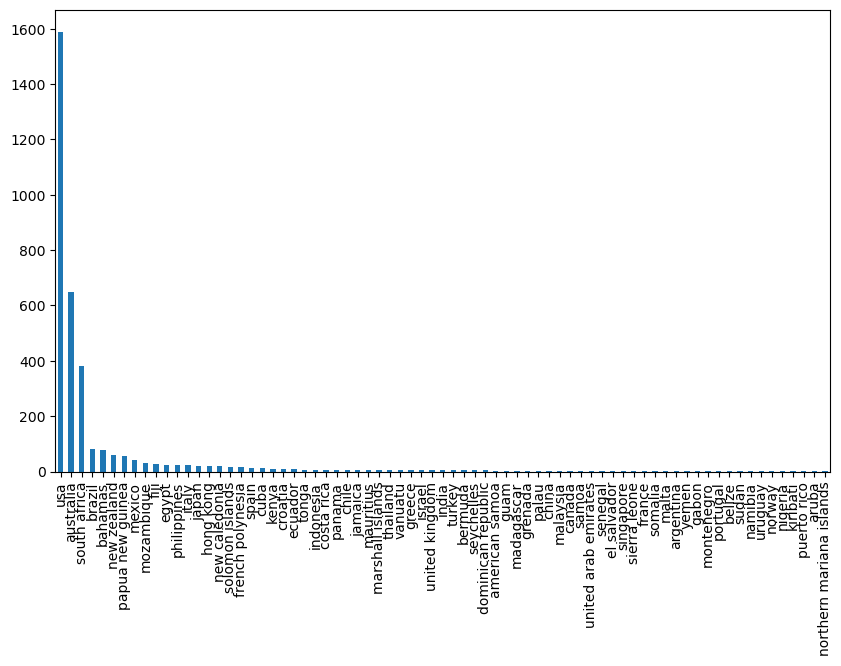

In [83]:
# Empiezo a visualizar los datos con los gráficos de barras

plt.figure(figsize=(10, 6))


sharkdata.country.value_counts().plot.bar();

In [84]:
# Aparecen demasiados países, no es muy legible, voy a acotar

In [85]:
# agrupar paises y contar su frecuencia
countrycount = sharkdata.groupby('country').country.count()


In [86]:
# fuera los países que aparecen menos de 10 veces en la lista
countrycount = countrycount[countrycount >= 10]


In [87]:
# elimino los paises que no estan dentro de ese rango 

sharkdata = sharkdata[sharkdata['country'].isin(countrycount.index)]


In [88]:
# Se va reduciendo más el tamaño de la tabla! 

sharkdata.shape

(3179, 26)

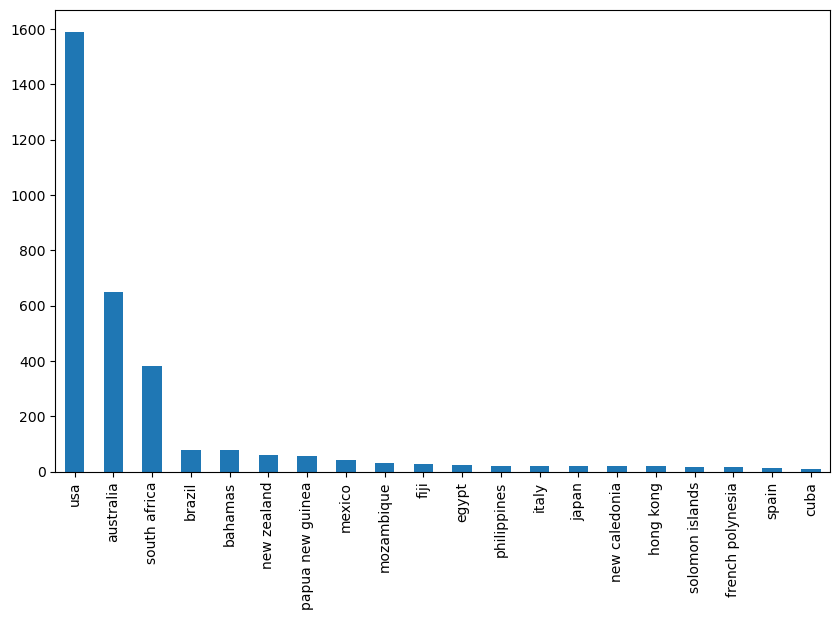

In [89]:
# Ahora se entiende todo mejor

plt.figure(figsize=(10, 6))

sharkdata.country.value_counts().plot.bar();

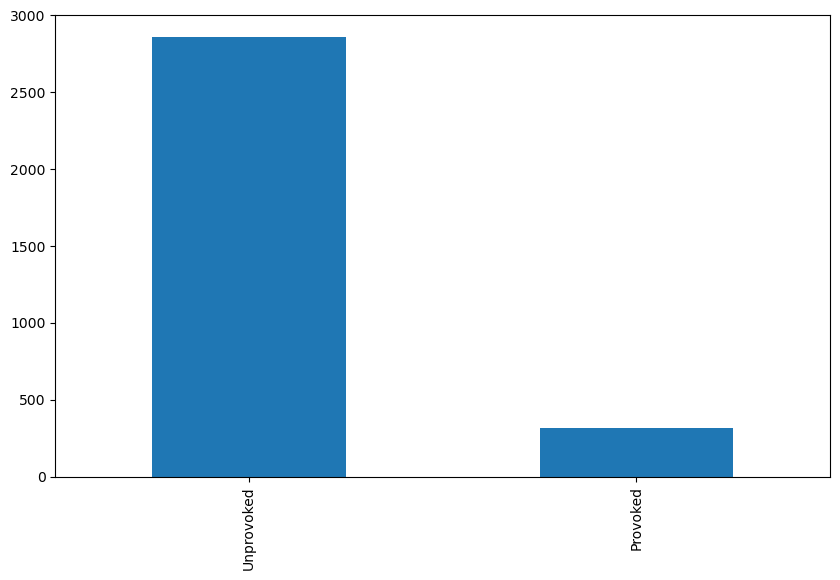

In [90]:
# Gráfico de ataques provocados y no provocados

plt.figure(figsize=(10, 6))

sharkdata.type.value_counts().plot.bar();

<AxesSubplot:xlabel='year'>

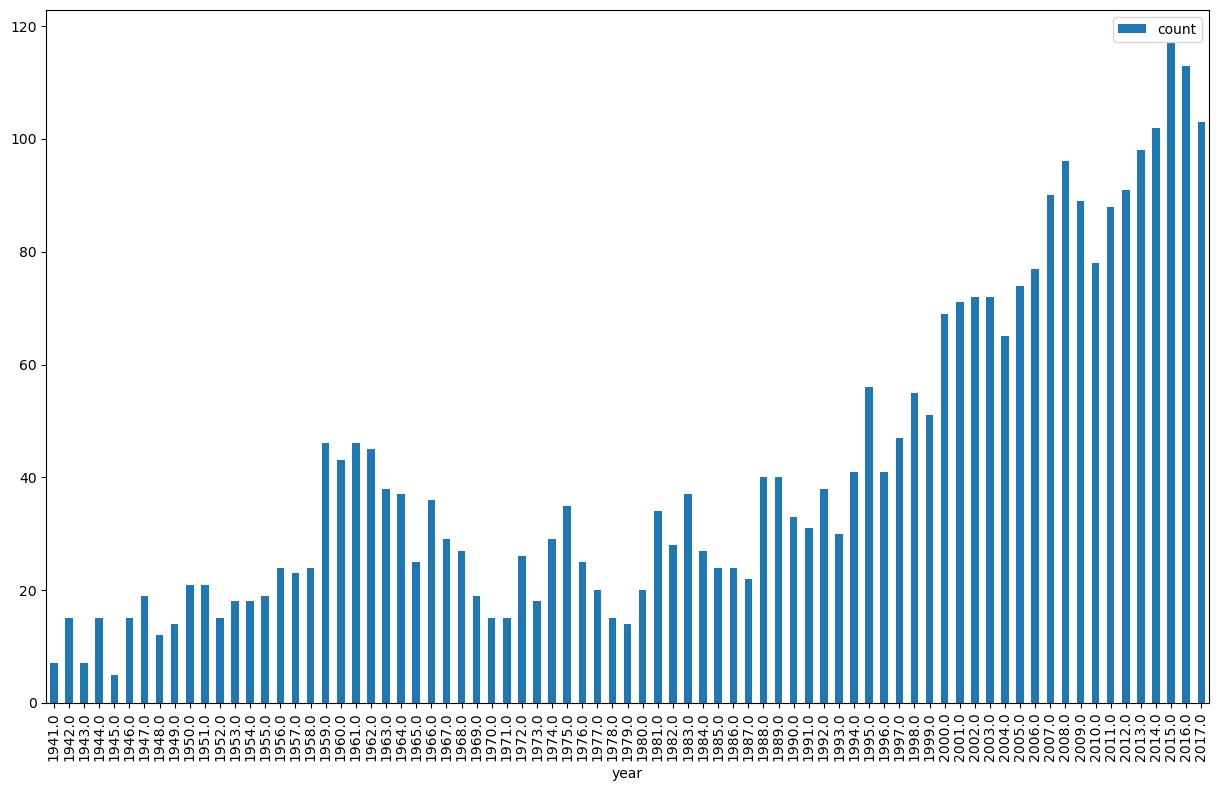

In [134]:
# Gráfico de los años de los ataques

groupeyear = sharkdata.groupby(['year']).size().reset_index(name='count')
groupeyear.sort_values(by='year', inplace=True, ascending=True)


groupeyear.plot.bar(x='year', y='count', figsize=(15, 9))




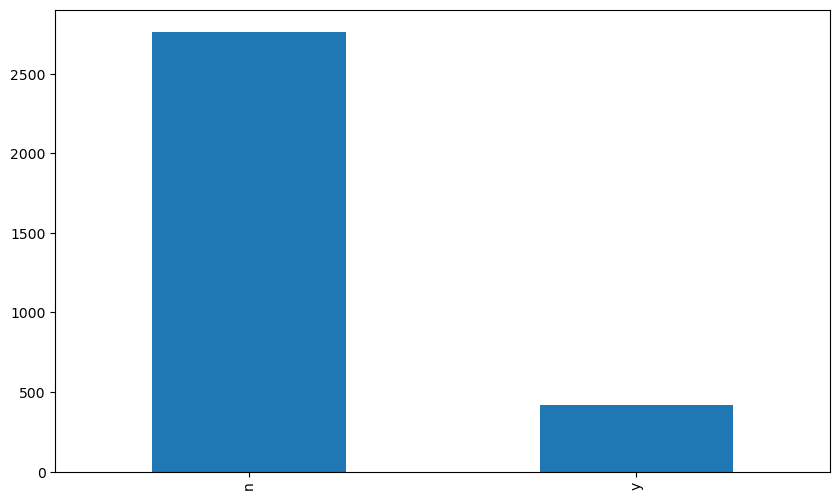

In [136]:
# Gráfico de los ataques que son mortales o no

plt.figure(figsize=(10, 6))

sharkdata['fatal_(y/n)'].value_counts().plot.bar();

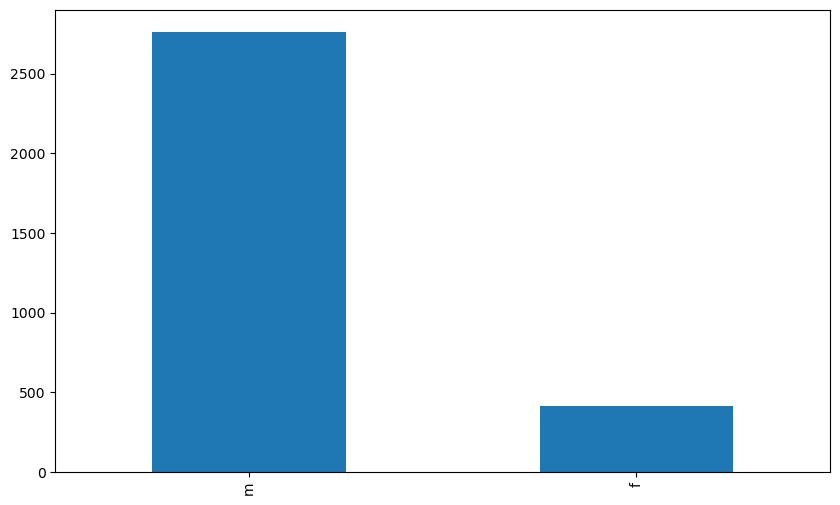

In [93]:
# Gráfico del género de las personas que son atacadas

plt.figure(figsize=(10, 6))

sharkdata.sex.value_counts().plot.bar();

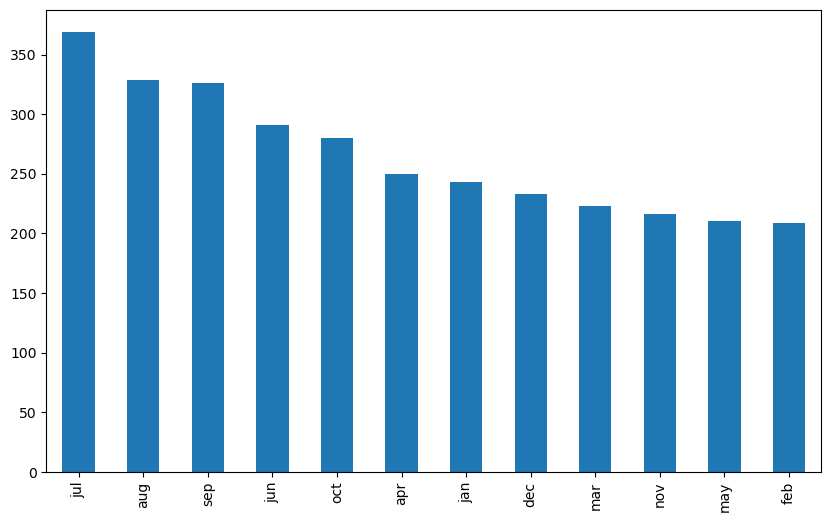

In [94]:
# Gráfico de los meses de los ataques

plt.figure(figsize=(10, 6))

sharkdata.month.value_counts().plot.bar();